<a href="https://colab.research.google.com/github/vikaskumar04121998/practical-for-deep-learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam

In [10]:
#Importing the data
(X_train, y_train),(X_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test
#Normalizing the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [24]:
classifier = Sequential()

#Adding the input LSTM network layer
classifier.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
classifier.add(Dropout(0.2))
classifier.add(LSTM(128))

#Adding a dense hidden layer
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.2))

#Adding the output layer
classifier.add(Dense(10, activation='softmax'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 220,874
Trainable params: 220,874
Non-trainable params: 0
________________________________________________

In [12]:
classifier.compile( loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001, decay=1e-6),metrics=['accuracy'] )

In [20]:
history=classifier.fit(X_train,y_train,epochs=6,validation_data=(X_test, y_test))

Epoch 1/6
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0369 - accuracy: 0.9898 - val_loss: 0.0452 - val_accuracy: 0.9892
Epoch 2/6
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0335 - accuracy: 0.9901 - val_loss: 0.0308 - val_accuracy: 0.9920
Epoch 3/6
1875/1875 [==============================] - 127s 67ms/step - loss: 0.0270 - accuracy: 0.9922 - val_loss: 0.0373 - val_accuracy: 0.9897
Epoch 4/6
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 0.0376 - val_accuracy: 0.9905
Epoch 5/6
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0228 - accuracy: 0.9936 - val_loss: 0.0409 - val_accuracy: 0.9890
Epoch 6/6
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0413 - val_accuracy: 0.9903


In [21]:
test_loss, test_acc = classifier.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

313/313 [==============================] - 7s 21ms/step - loss: 0.0413 - accuracy: 0.9903
Test Loss: 0.04132426902651787
Test Accuracy: 0.9902999997138977


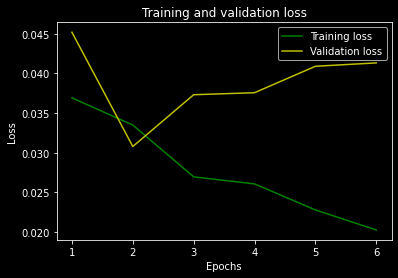

In [22]:
from matplotlib import pyplot as plt
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

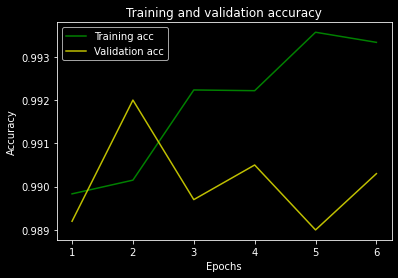

In [23]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()